## Paso 1: Segmentar las imagenes ya redimensionadas en 2240x2240 en 16x16

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd


In [2]:
from os import scandir, getcwd

#Obtenemos la lista de las imágenes a redimensionar
def lsJPG(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if (arch.is_file() and not arch.name.endswith('.2.jpg') 
                                                    and not arch.name.endswith('0.jpg') #no cargamos la img10
                                                    and arch.name.endswith('.jpg'))]

listImg = lsJPG("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada\\2240x2240")
print(listImg)

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [3]:
n = int(2240/16) #140

for img in listImg:
    recort = Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/"+img)
    for i in range(0,n):
        for j in range(0,n):
            region = recort.crop((i*16,j*16,i*16+16,j*16+16))
            subtring = img[0:-4]
            region.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16/"+
                        "imgID"+subtring+"-R"+str(i)+"C"+str(j)+".jpg")
    #Primero vamos a segmentar SOLO 1 IMAGEN
    #Una vez que funciona quitamos el break y segmentamos todas las imagenes
    #break


## Paso 2: Cargar todos los CSV mapeados con el programa auxiliar de Java y concatenarlos

In [3]:
import pandas as pd

In [5]:
#Vamos a cargar todos los CSV creados por el Programa de Java para mapear las imágenes.
def lsCSV(ruta = getcwd()):
    return[arch.name for arch in scandir(ruta) if (arch.is_file() and arch.name.endswith('.csv'))]

listCSV = lsCSV("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada\\2240x2240\CSV 16x16 Java")

listCSV = listCSV[:-1] #Quitamos el DatosImgTODOS.csv
print(listCSV)

['DatosImg1Seg16.csv', 'DatosImg2Seg16.csv', 'DatosImg3Seg16.csv', 'DatosImg4Seg16.csv', 'DatosImg5Seg16.csv', 'DatosImg6Seg16.csv', 'DatosImg7Seg16.csv', 'DatosImg8Seg16.csv', 'DatosImg9Seg16.csv']


In [6]:
#Concatenamos todos los CSV y obtenemos el mapeado de todas las imagenes en un mismo dataframe
dfConcat = pd.read_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/CSV 16x16 Java/" + listCSV[0])
for i in listCSV[1:]:
    dfNew = pd.read_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/CSV 16x16 Java/" + i)
    dfConcat = pd.concat([dfConcat,dfNew],ignore_index=True)

dfConcat.count()

Nombre Segmento    176400
Plasticos          176400
dtype: int64

## Paso 3: Visualizar las diferencias de las distintas clases

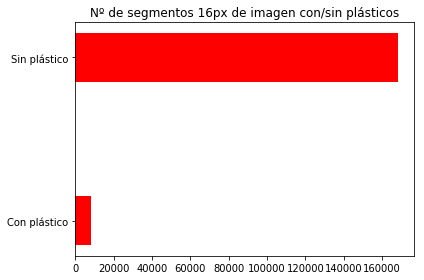

Imágenes a las que hay que hacer data augmentation:  8125
Imágenes sin plasticos:  168275


In [23]:
def visualizarClases(dfConcat):
    #Contamos cuantos fragmentos tenemos con/sin plásticos
    unos = dfConcat[dfConcat['Plasticos'] == 1].count()
    ceros = dfConcat[dfConcat['Plasticos'] == 0].count()

    #Graficos de barras bonicos ---> https://plot.ly/matplotlib/bar-charts/
    plt.barh(["Con plástico","Sin plástico"],[unos.values[0],ceros.values[0]],color="red",height=0.3)
    plt.title("Nº de segmentos 16px de imagen con/sin plásticos")
    
    plt.tight_layout()
    plt.savefig("NSegmentosImg-16px.jpg", pad_inches=30)
    plt.show()
    print("Imágenes a las que hay que hacer data augmentation: ", unos[0])
    print("Imágenes sin plasticos: ", ceros[0])
    
visualizarClases(dfConcat)

Lista de nº de plasticos por img:  [198, 99, 1985, 1418, 805, 1930, 959, 547, 184]


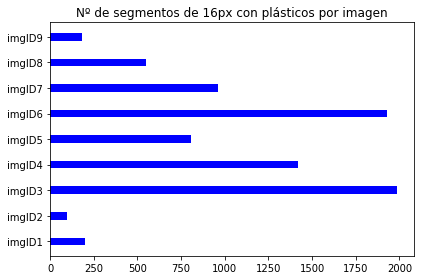

In [7]:
#Cantidad de unos por imagen
startName = ['imgID1','imgID2','imgID3','imgID4','imgID5','imgID6','imgID7','imgID8','imgID9']
imgInt = []
for i in startName:
    imgAux = dfConcat[dfConcat['Nombre Segmento'].str.startswith(i)]
    imgInt.append(imgAux[imgAux['Plasticos'] == 1].count()[0])

print("Lista de nº de plasticos por img: ", imgInt)    

#Grafico para ver la cantidad de pástico que hay por imagen
plt.barh(startName,imgInt, color="blue",height=0.3)
plt.title("Nº de segmentos de 16px con plásticos por imagen")
plt.tight_layout() 
#plt.savefig("NSegmentosPorImg-16px.jpg")
plt.show()

Vamos a comprobar los resultados obtenidos frente a la proporción de plastico en segmentos de 64x64

In [8]:
#Vamos a cargar todos los CSV creados por el Programa de Java para mapear las imágenes.
listCSV64 = lsCSV("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada\\2240x2240\CSV Java")
print(listCSV64) ##Sale el CSV de los datos aumentados
#Concatenamos todos los CSV y obtenemos el mapeado de todas las imagenes en un mismo dataframe
dfConcat64 = pd.read_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/CSV Java/" + listCSV64[0])
for i in listCSV64[1:-1]:
    dfNew = pd.read_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/CSV Java/" + i)
    dfConcat64 = pd.concat([dfConcat64,dfNew],ignore_index=True)

dfConcat64.count()

['DatosImg1.csv', 'DatosImg2.csv', 'DatosImg3.csv', 'DatosImg4.csv', 'DatosImg5.csv', 'DatosImg6.csv', 'DatosImg7.csv', 'DatosImg8.csv', 'DatosImg9.csv', 'DatosImgTODOS.csv']


Nombre Segmento    11025
Plasticos          11025
dtype: int64

Lista de nº de plasticos por img en segmentos de 16x16:  [198, 99, 1985, 1418, 805, 1930, 959, 547, 184]
Lista de nº de plasticos por img en segmentos de 64x64:  [26, 19, 226, 191, 95, 204, 116, 51, 21]

Comparación de la proporción de plasticos entre imágenes para los distintos tamaño de segmento:


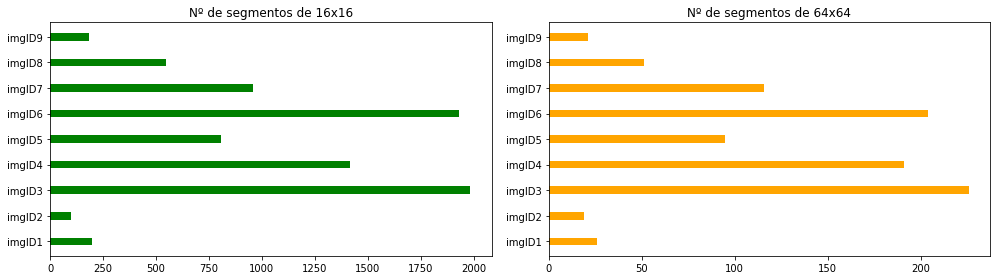

In [22]:
#Cantidad de unos por imagen
startName = ['imgID1','imgID2','imgID3','imgID4','imgID5','imgID6','imgID7','imgID8','imgID9']
imgInt2 = []
for i in startName:
    imgAux2 = dfConcat64[dfConcat64['Nombre Segmento'].str.startswith(i)]
    imgInt2.append(imgAux2[imgAux2['Plasticos'] == 1].count()[0])
    
print("Lista de nº de plasticos por img en segmentos de 16x16: ", imgInt)
print("Lista de nº de plasticos por img en segmentos de 64x64: ", imgInt2)  

print("\nComparación de la proporción de plasticos entre imágenes para los distintos tamaño de segmento:")

#Grafico para ver la cantidad de pástico que hay por imagen
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.barh(startName,imgInt, color="green",height=0.3)
plt.title("Nº de segmentos de 16x16")

plt.subplot(122)
plt.barh(startName,imgInt2, color="orange",height=0.3)
plt.title("Nº de segmentos de 64x64")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.15)
plt.tight_layout()
plt.savefig("PlasticosPorImg2Graficas-16_64px.jpg")
plt.show()

Lista de nº de plasticos por img en segmentos de 16x16:  [0.0580707  0.02903535 0.5821734  0.41588004 0.23609551 0.56604265
 0.28126161 0.16042763 0.05396469]
Lista de nº de plasticos por img en segmentos de 64x64:  [0.06588446 0.04814634 0.57268804 0.48399742 0.2407317  0.51693965
 0.29394607 0.12923491 0.05321438]


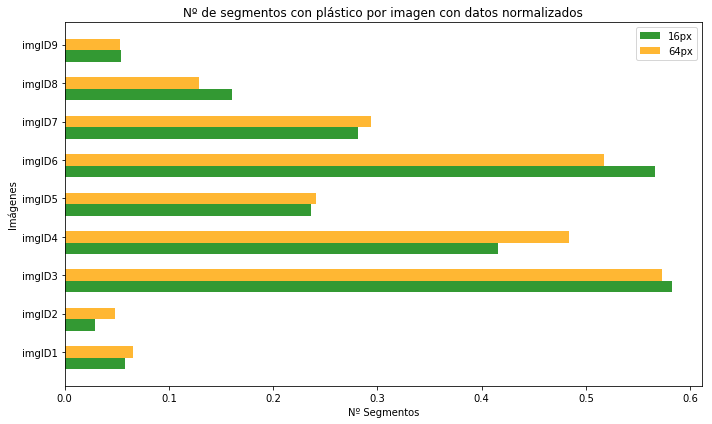

In [21]:
from sklearn.preprocessing import normalize

startName = ['imgID1','imgID2','imgID3','imgID4','imgID5','imgID6','imgID7','imgID8','imgID9']
imgInt2 = []
for i in startName:
    imgAux2 = dfConcat64[dfConcat64['Nombre Segmento'].str.startswith(i)]
    imgInt2.append(imgAux2[imgAux2['Plasticos'] == 1].count()[0])


imgInt3 = normalize(np.array(imgInt)[:,np.newaxis], axis=0).ravel()

imgInt4 = normalize(np.array(imgInt2)[:,np.newaxis], axis=0).ravel() 
print("Lista de nº de plasticos por img en segmentos de 16x16: ", imgInt3)
print("Lista de nº de plasticos por img en segmentos de 64x64: ", imgInt4)  

# create plot
fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(len(startName))
bar_width = 0.35
opacity = 0.8

rects1 = plt.barh(index, imgInt3, 0.3, align='center',
            alpha=opacity,
            color='green',
            label='16px')

rects2 = plt.barh(index + 0.3 , imgInt4, 0.3, align='center',
            alpha=opacity,
            color='orange',
            label='64px')

plt.xlabel('Nº Segmentos')
plt.ylabel('Imágenes')
plt.title('Nº de segmentos con plástico por imagen con datos normalizados')
plt.yticks(index + 0.3 , startName)
plt.legend()

plt.tight_layout()
plt.savefig("PlasticosPorImgNormalizado-16_64px.jpg")
plt.show()

Como podemos observar la proporción de plasticos entre imágenes se matiene practicamente igual, excepto para la imagen 4, donde podemos suponer que los segmentos con plastico tenian mucha parte de arena. 

Podemos concluir que la precisión que nos aporta la segmentacion de las imágenes en pixeles de 16x16 es mayor, ya que, permite cortonear mejor las zonas con plastico. Observando las gráficas comparativas y las imágenes originales podemos entender las diferencias de las mismas.<br/><br/>
En la imagen 4 y la imagen 6 en la segmentacion de 64x64, parece que tienen practicamente la misma cantidad de plastico, cosa que al visualizar las imágenes vemos que no es así. Ya que en la imagen 6 hay una mayor densidad de plastico frente a la imagen 4, tal y como se muestra en la gráfica de la segmentación de 16x16.


## Paso 4: Hacer data augmentation de los segmentos con plástico

Usaremos la siguiente función con las distintas rotaciones y trasformaciones para aumentar los datos de aquellos segmentos que tengan plástico.<br/>
**Image.transpose(method)**<br/>
method – Possible values of method are:<br/>
PIL.Image.FLIP_LEFT_RIGHT<br/>
PIL.Image.FLIP_TOP_BOTTOM<br/>
PIL.Image.ROTATE_90<br/>
PIL.Image.ROTATE_180<br/>
PIL.Image.ROTATE_270<br/>
PIL.Image.TRANSPOSE or PIL.Image.TRANSVERSE.<br/>

In [24]:
#Bucle for para realizar el Data Augmentation
listPlastico = dfConcat[dfConcat['Plasticos'] == 1]['Nombre Segmento'].tolist()
listNewImg = []
for i in listPlastico:
    imagenOriginal = Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 aug/"+i+".jpg")

    imagen90 = imagenOriginal.transpose(Image.ROTATE_90)
    listNewImg.append(i[:5] +"a"+ i[5:])
    imagen90.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 augmentation/"+i[:5] +"a"+ i[5:]+".jpg")
    imagen180 = imagenOriginal.transpose(Image.ROTATE_180)
    listNewImg.append(i[:5] +"b"+ i[5:])
    imagen180.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 augmentation/"+i[:5] +"b"+ i[5:]+".jpg")
    imagen270 = imagenOriginal.transpose(Image.ROTATE_270)
    listNewImg.append(i[:5] +"c"+ i[5:])
    imagen270.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 augmentation/"+i[:5] +"c"+ i[5:]+".jpg")
    
    imagenTOPMirror = imagenOriginal.transpose(Image.FLIP_TOP_BOTTOM)
    listNewImg.append(i[:5] +"d"+ i[5:])
    imagenTOPMirror.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 augmentation/"
                         +i[:5] +"d"+ i[5:]+".jpg")
    imagenLEFTMirror = imagenOriginal.transpose(Image.FLIP_LEFT_RIGHT)
    listNewImg.append(i[:5] +"e"+ i[5:])
    imagenLEFTMirror.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 augmentation/"
                          +i[:5] +"e"+ i[5:]+".jpg")
    
    imagenTRANSVERSE = imagenOriginal.transpose(Image.TRANSVERSE)
    listNewImg.append(i[:5] +"f"+ i[5:])
    imagenTRANSVERSE.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 augmentation/"
                          +i[:5] +"f"+ i[5:]+".jpg")
    imagenTRANSPOSE = imagenOriginal.transpose(Image.TRANSPOSE)
    listNewImg.append(i[:5] +"g"+ i[5:])
    imagenTRANSPOSE.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 augmentation/"
                         +i[:5] +"g"+ i[5:]+".jpg")

print(len(listNewImg))

56875


Vamos a concatenar en un CSV todos los segmentos, tanto los originales como los modificados para el augmentation

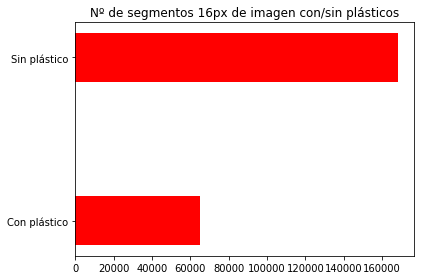

Imágenes a las que hay que hacer data augmentation:  65000
Imágenes sin plasticos:  168275


In [25]:
listNewImgUnos = np.ones(len(listNewImg),dtype=int)
dframe = pd.DataFrame({"Nombre Segmento":listNewImg, "Plasticos":listNewImgUnos}) 
dframe = pd.concat([dfConcat,dframe],ignore_index=True)

visualizarClases(dframe)
dframe.count()

#Guardamos el DataFrame con el data augmentation
dframe.to_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/CSV 16x16 Java/DatosImgTODOS.csv", header=True, index=False)

Como la diferencia entre clases sigue siendo bastante grande vamos a cortar de forma aleatoria los segmentos sin plastico hasta igualar a los de con plastico

In [25]:
import random

In [26]:
unosList = dframe[dframe['Plasticos'] == 1]['Nombre Segmento'].tolist()
cerosList = dframe[dframe['Plasticos'] == 0]['Nombre Segmento'].tolist()
print("Imágenes con plásticos: ", len(unosList))
print("Imágenes sin plásticos: ", len(cerosList))

random.shuffle(cerosList)
random.shuffle(unosList)
cerosList = cerosList[:len(unosList)]
print("Ahora igualamos el nº de elementos: \ncerosList = ", len(cerosList))

Imágenes con plásticos:  65000
Imágenes sin plásticos:  168275
Ahora igualamos el nº de elementos: 
cerosList =  65000


In [29]:
from sklearn.model_selection import train_test_split
x = unosList + cerosList
y = np.concatenate([np.ones((len(unosList),),dtype=int),np.zeros((len(cerosList),),dtype=int)])

X_trainList, X_testList, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify=y)
print("xTrain: ", len(X_trainList))
print("xTest: ", len(X_testList))
print("yTrain: ", len(Y_train))
print(Y_train[0:50])
print("yTest : ", len(Y_test))
print(Y_test[0:50])


xTrain:  91000
xTest:  39000
yTrain:  91000
[0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 1 1 0 1 1 0 1]
yTest :  39000
[0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 0 0 1 1 1 0 1 0 0 1 1 1 1]


Los arrays estan mezclados ahora vamos a comprobar que contienen la misma cantidad de cada clase.

In [30]:
#Comprobamos que está bien separado por proporciones
yTrainUnos, yTrainCeros, yTestUnos, yTestCeros = [0] * 4

for i in Y_train:
    if i == 0:
        yTrainCeros+=1
    else:
        yTrainUnos+=1

for i in Y_test:
    if i == 0:
        yTestCeros+=1
    else:
        yTestUnos+=1
        
print("valores de Train para cada conjunto = ",yTrainCeros,yTrainUnos)
print("valores de Test para cada conjunto =",yTestCeros,yTestUnos)

valores de Train para cada conjunto =  45500 45500
valores de Test para cada conjunto = 19500 19500


**No tienen la misma proporción** de segmentos en plastico que con arena, por lo que, prefiero hacer la división manualmente. Entrenaremos la red con los **dos datos** y comprobaremos resultados.
Usando **stratify=y** hacemos que tenga la misma proporción los 0 y los 1.

In [115]:
nElementosTrain = int(len(cerosList)* 0.7)
print("Nº de elementos de cada lista para train ", nElementosTrain)

XtrainList = cerosList[:nElementosTrain] + unosList[:nElementosTrain]
random.shuffle(XtrainList)
print("Nº de elementos de X_train", len(XtrainList))

XtestList = cerosList[nElementosTrain:] + unosList[nElementosTrain:]
random.shuffle(XtestList)
print("Nº de elementos de X_test", len(XtestList))

Nº de elementos de cada lista para train  45500
Nº de elementos de X_train 91000
Nº de elementos de X_test 39000


In [116]:
#Preparamos los outputs para cada img
Ytrain = []
for i in XtrainList:
    if i in cerosList : 
        Ytrain.extend([0])
    else:
        Ytrain.extend([1])

print(len(Ytrain))

Ytest = []
for i in XtestList:
    if i in cerosList : 
        Ytest.extend([0])
    else:
        Ytest.extend([1])

print(len(Ytest))
#COmprobar que esté poniendo el nº de 1 bien

91000
39000


## Paso 5: Preparación y entrenamiento de la red neuronal básica utilizada en la Prueba 4

In [31]:
#Array con todas las imágenes a entrenar sklearn
X_train = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 aug/"+img + ".jpg")) for img in X_trainList] )
print(X_train.shape)
X_test = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 aug/"+img + ".jpg")) for img in X_testList] )
print(X_test.shape)


(91000, 16, 16, 3)
(39000, 16, 16, 3)


In [32]:
#Normalizamos la imagen sklearn
X_train= X_train / 255.0
X_test= X_test / 255.0
print(X_train.shape)
print(X_test.shape)

(91000, 16, 16, 3)
(39000, 16, 16, 3)


### Paso 5.1: Entrenamiento de la red con los datos separados con sklearn

In [36]:
from keras.models                import Sequential, Model
from keras.layers                import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.layers                import Conv2DTranspose, UpSampling2D, MaxPooling2D, Reshape, Activation, ReLU
from keras.preprocessing.image   import ImageDataGenerator
from keras.utils                 import to_categorical
from keras.optimizers            import SGD
from keras.callbacks             import ModelCheckpoint, LearningRateScheduler

In [34]:
#Primero entrenaremos con el mismo modelo que en la prueba4
modelp4 = Sequential()
modelp4.add(Conv2D(16, (3, 3), input_shape=(16, 16,3)))
modelp4.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp4.add(Activation('relu'))

modelp4.add(Conv2D(64, (3, 3)))
modelp4.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp4.add(Activation('relu'))

modelp4.add(Flatten())  
modelp4.add(Dense(128, activation='relu'))
modelp4.add(Dense(64, activation='relu'))
modelp4.add(Dropout(0.5))
modelp4.add(Dense(1, activation='sigmoid'))
modelp4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [37]:
#Primero entrenamos con los datos separados con sklearn
model_checkpoint = ModelCheckpoint('Segmentation16x16RedPesos.hdf5', monitor='val_loss',verbose=1, save_best_only=True)
modelp4.fit(X_train, Y_train,  batch_size=32, validation_data=[X_test, Y_test], epochs=10, callbacks=[model_checkpoint])

Train on 91000 samples, validate on 39000 samples
Epoch 1/10
91000/91000 [==============================] - 36s 398us/step - loss: 0.3568 - acc: 0.8442 - val_loss: 0.3194 - val_acc: 0.8602

Epoch 00001: val_loss improved from inf to 0.31945, saving model to Segmentation32x32RedPesos.hdf5
Epoch 2/10
91000/91000 [==============================] - 32s 355us/step - loss: 0.2774 - acc: 0.8935 - val_loss: 0.2714 - val_acc: 0.8913

Epoch 00002: val_loss improved from 0.31945 to 0.27138, saving model to Segmentation32x32RedPesos.hdf5
Epoch 3/10
91000/91000 [==============================] - 32s 349us/step - loss: 0.2602 - acc: 0.9015 - val_loss: 0.2684 - val_acc: 0.8970

Epoch 00003: val_loss improved from 0.27138 to 0.26836, saving model to Segmentation32x32RedPesos.hdf5
Epoch 4/10
91000/91000 [==============================] - 32s 349us/step - loss: 0.2481 - acc: 0.9075 - val_loss: 0.2572 - val_acc: 0.8991

Epoch 00004: val_loss improved from 0.26836 to 0.25720, saving model to Segmentation3

Probamos entrenando la red con el optimizador sgd

In [135]:
#Primero entrenaremos con el mismo modelo que en la prueba4
modelp42 = Sequential()
modelp42.add(Conv2D(16, (3, 3), input_shape=(16, 16,3)))
modelp42.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp42.add(Activation('relu'))

modelp42.add(Conv2D(64, (3, 3)))
modelp42.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp42.add(Activation('relu'))

modelp42.add(Flatten())  
modelp42.add(Dense(128, activation='relu'))
modelp42.add(Dense(64, activation='relu'))
modelp42.add(Dropout(0.5))
modelp42.add(Dense(1, activation='sigmoid'))
modelp42.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 

In [136]:
#Primero entrenamos con los datos separados con sklearn
modelp42.fit(X_train, Y_train,  batch_size=32, validation_data=[X_test, Y_test], epochs=20)

Train on 91000 samples, validate on 39000 samples
Epoch 1/20
91000/91000 [==============================] - 33s 368us/step - loss: 0.5242 - acc: 0.7285 - val_loss: 0.3908 - val_acc: 0.8330
Epoch 2/20
91000/91000 [==============================] - 34s 377us/step - loss: 0.3737 - acc: 0.8406 - val_loss: 0.3204 - val_acc: 0.8702
Epoch 3/20
91000/91000 [==============================] - 33s 357us/step - loss: 0.3180 - acc: 0.8714 - val_loss: 0.3586 - val_acc: 0.8462
Epoch 4/20
91000/91000 [==============================] - 32s 356us/step - loss: 0.2954 - acc: 0.8828 - val_loss: 0.2821 - val_acc: 0.8882
Epoch 5/20
91000/91000 [==============================] - 34s 369us/step - loss: 0.2823 - acc: 0.8890 - val_loss: 0.2647 - val_acc: 0.8982
Epoch 6/20
91000/91000 [==============================] - 32s 348us/step - loss: 0.2730 - acc: 0.8940 - val_loss: 0.2595 - val_acc: 0.8968
Epoch 7/20
91000/91000 [==============================] - 32s 352us/step - loss: 0.2661 - acc: 0.8976 - val_loss: 0.

Con el optimizador **adam** conseguimos mejores resultados

### Paso 5.2: Observación de los resultados obtenidos para los datos con sklearn

In [38]:
print("---Evaluacion----")
ev = modelp4.evaluate(X_test, Y_test, batch_size=32)
print(ev) #ev_loss - ev_acc

---Evaluacion----
39000/39000 [==============================] - 5s 136us/step
[0.2202321177889139, 0.918641025628799]


In [39]:
from sklearn.metrics import confusion_matrix

predicted_values = modelp4.predict(X_test)
predicted_values = np.ravel(predicted_values) #Lo volvemos un array monodimensional

predicted_values = [round(i,3) for i in predicted_values]
print("Lista de los valores predichos con 3 decimales:", predicted_values[0:50])

predicted_values_round = np.asarray([int(round(i)) for i in predicted_values])
print("\nArray de los valores predichos redondeados a entero: ", predicted_values_round[0:50])
print("\nArray de los valores originales: ", Y_test[0:50])

conf_mat = confusion_matrix(Y_test, predicted_values_round)
conf_mat

Lista de los valores predichos con 3 decimales: [0.036, 1.0, 0.783, 0.01, 0.019, 1.0, 0.77, 0.193, 0.046, 0.993, 0.118, 0.992, 0.996, 0.034, 0.019, 0.971, 0.093, 0.999, 0.042, 0.998, 1.0, 1.0, 0.233, 0.708, 0.974, 0.027, 0.07, 0.992, 0.084, 1.0, 1.0, 0.02, 0.019, 0.992, 1.0, 0.985, 0.998, 0.039, 0.17, 0.663, 0.951, 0.714, 0.212, 0.938, 0.08, 0.172, 0.032, 0.867, 1.0, 0.996]

Array de los valores predichos redondeados a entero:  [0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1
 0 0 1 1 1 0 1 0 0 0 1 1 1]

Array de los valores originales:  [0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1
 0 0 1 1 1 0 1 0 0 1 1 1 1]


array([[18453,  1047],
       [ 2128, 17372]], dtype=int64)

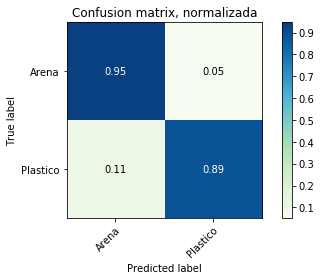

In [40]:
def matrixConfusion (conf_mat, cmap):
    
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(conf_mat.shape[1]),
            yticks=np.arange(conf_mat.shape[0]),
            xticklabels=["Arena","Plastico"], yticklabels=["Arena","Plastico"],
            title='Confusion matrix, normalizada',
            ylabel='True label',
            xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(j, i, format(conf_mat[i, j], fmt),
                    ha="center", va="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig("MatrizConfusion-16px.jpg")

    plt.show()
    
matrixConfusion(conf_mat,'GnBu')

### Paso 5.3: Entrenamiento de la red con los datos separados manualmente

In [ ]:
#Array con todas las imágenes a entrenar con los segmentos divididos manualmente
Xtrain = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 aug/"+img + ".jpg")) for img in XtrainList] )
print(Xtrain.shape)
Xtest = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 aug/"+img + ".jpg")) for img in XtestList] )
print(Xtest.shape)

In [137]:
#Normalizamos la imagen con los segmentos divididos manualmente
Xtrain= Xtrain / 255.0
Xtest= Xtest / 255.0
print(Xtrain.shape)
print(Xtest.shape)

(91000, 16, 16, 3)
(39000, 16, 16, 3)


In [231]:
#Primero entrenaremos con el mismo modelo que en la prueba4
modelp4M = Sequential()
modelp4M.add(Conv2D(16, (3, 3), input_shape=(16, 16,3)))
modelp4M.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp4M.add(Activation('relu'))

modelp4M.add(Conv2D(64, (3, 3)))
modelp4M.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp4M.add(Activation('relu'))

modelp4M.add(Flatten())  
modelp4M.add(Dense(128, activation='relu'))
modelp4M.add(Dense(64, activation='relu'))
modelp4M.add(Dropout(0.5))
modelp4M.add(Dense(1, activation='sigmoid'))
modelp4M.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [232]:
#Entrenamos con los datos separados manualmente
modelp4M.fit(Xtrain, Ytrain,  batch_size=32, validation_data=[Xtest, Ytest], epochs=20)

Train on 91000 samples, validate on 39000 samples
Epoch 1/20
91000/91000 [==============================] - 38s 413us/step - loss: 0.3557 - acc: 0.8486 - val_loss: 0.2788 - val_acc: 0.8909
Epoch 2/20
91000/91000 [==============================] - 36s 393us/step - loss: 0.2860 - acc: 0.8885 - val_loss: 0.2485 - val_acc: 0.9023
Epoch 3/20
91000/91000 [==============================] - 36s 394us/step - loss: 0.2675 - acc: 0.8970 - val_loss: 0.2560 - val_acc: 0.8991
Epoch 4/20
91000/91000 [==============================] - 36s 400us/step - loss: 0.2542 - acc: 0.9033 - val_loss: 0.2424 - val_acc: 0.9085
Epoch 5/20
91000/91000 [==============================] - 36s 399us/step - loss: 0.2468 - acc: 0.9075 - val_loss: 0.2356 - val_acc: 0.9107
Epoch 6/20
91000/91000 [==============================] - 36s 401us/step - loss: 0.2373 - acc: 0.9107 - val_loss: 0.2312 - val_acc: 0.9095
Epoch 7/20
91000/91000 [==============================] - 36s 399us/step - loss: 0.2320 - acc: 0.9123 - val_loss: 0.

**Estos resultados son los que se obtienen con mas epoch, como podemos observar a partir de la epoch 21 se produce overfiting.**<br/>
Epoch 20/30<br/>
91000/91000 [==============================] - 34s 376us/step - loss: 0.1833 - acc: 0.9320 - val_loss: 0.2415 - val_acc: 0.9118<br/>
Epoch 21/30<br/>
91000/91000 [==============================] - 33s 364us/step - loss: 0.1797 - acc: 0.9334 - val_loss: 0.2221 - val_acc: 0.9201<br/>
Epoch 22/30<br/>
91000/91000 [==============================] - 34s 373us/step - loss: 0.1778 - acc: 0.9335 - val_loss: 0.2410 - val_acc: 0.9165<br/>
Epoch 23/30<br/>
91000/91000 [==============================] - 33s 367us/step - loss: 0.1735 - acc: 0.9348 - val_loss: 0.2271 - val_acc: 0.9187<br/>
Epoch 24/30<br/>
91000/91000 [==============================] - 34s 371us/step - loss: 0.1720 - acc: 0.9360 - val_loss: 0.2328 - val_acc: 0.9164<br/>
Epoch 25/30<br/>
91000/91000 [==============================] - 34s 374us/step - loss: 0.1683 - acc: 0.9371 - val_loss: 0.2336 - val_acc: 0.9154<br/>

### Paso 5.4: Observación de los resultados obtenidos para los datos separados manualmente

In [233]:
predicted_values_manual =  np.ravel(modelp4M.predict(Xtest))


predicted_values_manual = [round(i,3) for i in predicted_values_manual]
print("Lista de los valores predichos con 3 decimales:", predicted_values_manual[0:50])

predicted_values_round_manual = np.asarray([int(round(i)) for i in predicted_values_manual])
print("\nArray de los valores predichos redondeados a entero: ", predicted_values_round_manual[0:50])
print("\nArray de los valores originales: ", Ytest[0:50])

conf_mat_manual = confusion_matrix(Ytest, predicted_values_round_manual)
conf_mat_manual

Lista de los valores predichos con 3 decimales: [0.023, 1.0, 0.117, 0.061, 0.037, 0.062, 0.224, 0.032, 0.037, 1.0, 0.059, 1.0, 0.972, 1.0, 1.0, 0.005, 0.002, 0.012, 0.996, 0.022, 0.995, 1.0, 0.007, 0.001, 1.0, 1.0, 1.0, 0.959, 0.786, 0.749, 0.041, 0.041, 0.024, 0.011, 1.0, 0.008, 0.017, 0.039, 1.0, 0.012, 0.016, 0.999, 1.0, 0.221, 0.001, 0.999, 1.0, 0.999, 0.888, 0.002]

Array de los valores predichos redondeados a entero:  [0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 1 1 1 1 0]

Array de los valores originales:  [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]


array([[18220,  1280],
       [ 1780, 17720]], dtype=int64)

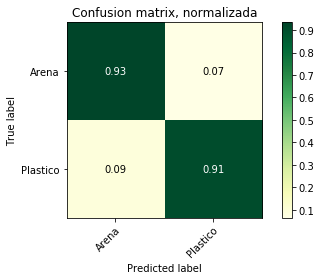

In [234]:
matrixConfusion(conf_mat_manual,'YlGn')

In [204]:
plasticos = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/Segmentadas16x16 aug/"+img + ".jpg")) for img in unosList[nElementosTrain:]] )
print(plasticos.shape)

plasticos = plasticos/255
Y_plasticos = np.ones((len(plasticos),),dtype=int)



(19500, 16, 16, 3)

------Evaluación para imágenes con solo plastico conjunto test--------


NameError: name 'model' is not defined

In [205]:
print("\n------Evaluación para imágenes con solo plastico conjunto test--------")
ev3 = modelp4M.evaluate(plasticos,Y_plasticos, batch_size=32)
print(ev3) #ev_loss - ev_acc


------Evaluación para imágenes con solo plastico conjunto test--------
19500/19500 [==============================] - 3s 159us/step
[0.7187564455301334, 0.08348717948717949]


**ALGO RARO PASA SOLO ACIERTA UN 0.08 DE LOS PLASTICOS**

### Paso 5.5: Entrenamiento con redes mas pequeñas

In [208]:
#Hemos quitado una capa conv y una capa densa
modelp4MS = Sequential()
modelp4MS.add(Conv2D(32, (3, 3), input_shape=(16, 16,3)))
modelp4MS.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp4MS.add(Activation('relu'))

modelp4MS.add(Flatten())  
modelp4MS.add(Dense(64, activation='relu'))
modelp4MS.add(Dropout(0.5))
modelp4MS.add(Dense(1, activation='sigmoid'))
modelp4MS.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [209]:
#Entrenamos con los datos separados manualmente
modelp4MS.fit(Xtrain, Ytrain,  batch_size=32, validation_data=[Xtest, Ytest], epochs=20)

Train on 91000 samples, validate on 39000 samples
Epoch 1/20
91000/91000 [==============================] - 36s 393us/step - loss: 0.3622 - acc: 0.8471 - val_loss: 0.2822 - val_acc: 0.8903
Epoch 2/20
91000/91000 [==============================] - 32s 355us/step - loss: 0.2966 - acc: 0.8863 - val_loss: 0.2592 - val_acc: 0.9022
Epoch 3/20
91000/91000 [==============================] - 32s 352us/step - loss: 0.2768 - acc: 0.8962 - val_loss: 0.2511 - val_acc: 0.9035
Epoch 4/20
91000/91000 [==============================] - 32s 356us/step - loss: 0.2652 - acc: 0.9000 - val_loss: 0.2294 - val_acc: 0.9117
Epoch 5/20
91000/91000 [==============================] - 32s 355us/step - loss: 0.2572 - acc: 0.9039 - val_loss: 0.2267 - val_acc: 0.9174
Epoch 6/20
91000/91000 [==============================] - 31s 340us/step - loss: 0.2497 - acc: 0.9057 - val_loss: 0.2306 - val_acc: 0.9146
Epoch 7/20
91000/91000 [==============================] - 32s 356us/step - loss: 0.2454 - acc: 0.9079 - val_loss: 0.

### Paso 5.6: Resultados obtenidos

In [223]:
pv =  np.ravel(modelp4MS.predict(Xtest))

pv = [round(i,3) for i in pv]
print("Lista de los valores predichos con 3 decimales:", pv[0:50])

pv_round = np.asarray([int(round(i)) for i in pv])
print("\nArray de los valores predichos redondeados a entero: ", pv_round[0:50])
print("\nArray de los valores originales: ", Ytest[0:50])

conf_mat_p = confusion_matrix(Ytest, pv_round)
conf_mat_p

Lista de los valores predichos con 3 decimales: [0.064, 0.997, 0.013, 0.123, 0.118, 0.158, 0.041, 0.215, 0.009, 1.0, 0.032, 1.0, 0.929, 1.0, 1.0, 0.015, 0.004, 0.03, 0.992, 0.006, 0.993, 1.0, 0.046, 0.007, 1.0, 1.0, 0.996, 0.995, 0.892, 0.643, 0.019, 0.058, 0.03, 0.012, 1.0, 0.04, 0.007, 0.024, 1.0, 0.065, 0.024, 1.0, 0.998, 0.186, 0.046, 0.766, 1.0, 0.267, 0.454, 0.002]

Array de los valores predichos redondeados a entero:  [0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 1 1 0 0 0]

Array de los valores originales:  [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0]


array([[18959,   541],
       [ 2749, 16751]], dtype=int64)

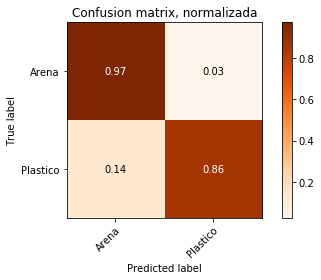

In [224]:
matrixConfusion(conf_mat_p,'Oranges')

### Paso 5.7: Entrenamiento de una red neuronal mas pequeña con los datos separados con sklearn

In [216]:
#Hemos quitado una capa conv y una capa densa
modelp5sl = Sequential()
modelp5sl.add(Conv2D(32, (3, 3), input_shape=(16, 16,3)))
modelp5sl.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp5sl.add(Activation('relu'))

modelp5sl.add(Flatten())  
modelp5sl.add(Dense(64, activation='relu'))
modelp5sl.add(Dropout(0.5))
modelp5sl.add(Dense(1, activation='sigmoid'))
modelp5sl.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [217]:
#Entrenamos con los datos separados manualmente
modelp5sl.fit(X_train, Y_train,  batch_size=32, validation_data=[X_test, Y_test], epochs=20)

Train on 91000 samples, validate on 39000 samples
Epoch 1/20
91000/91000 [==============================] - 291s 3ms/step - loss: 0.3647 - acc: 0.8441 - val_loss: 0.2702 - val_acc: 0.8943
Epoch 2/20
91000/91000 [==============================] - 32s 354us/step - loss: 0.2837 - acc: 0.8931 - val_loss: 0.2491 - val_acc: 0.9052
Epoch 3/20
91000/91000 [==============================] - 32s 351us/step - loss: 0.2667 - acc: 0.9007 - val_loss: 0.2463 - val_acc: 0.9110
Epoch 4/20
91000/91000 [==============================] - 32s 353us/step - loss: 0.2575 - acc: 0.9051 - val_loss: 0.2359 - val_acc: 0.9120
Epoch 5/20
91000/91000 [==============================] - 32s 355us/step - loss: 0.2515 - acc: 0.9064 - val_loss: 0.2443 - val_acc: 0.9032
Epoch 6/20
91000/91000 [==============================] - 31s 338us/step - loss: 0.2473 - acc: 0.9079 - val_loss: 0.2302 - val_acc: 0.9144
Epoch 7/20
91000/91000 [==============================] - 32s 352us/step - loss: 0.2402 - acc: 0.9107 - val_loss: 0.2

### Paso 5.8: Resultados para una red neuronal mas pequeña con los datos separados con sklearn

In [221]:
pvsk =  np.ravel(modelp5sl.predict(X_test))
pvsk_round = np.asarray([int(round(i)) for i in pvsk])
conf_mat_psk = confusion_matrix(Y_test, pvsk_round)
conf_mat_psk

array([[18732,   874],
       [ 2157, 17237]], dtype=int64)

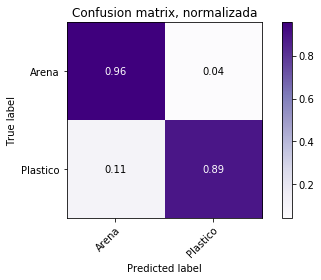

In [222]:
matrixConfusion(conf_mat_psk,'Purples')

## Paso 6: Crear un Modelo de Regresión Lineal para estimar la cantidad de plastico en gramos

Vamos a crear el modelo de regresion con las muestras mapeadas y luego comprobaremos sus resultados con imágenes nunca vistas por la red de otro dataset.

In [236]:
#Datos calculados en celdas superiores
print("Lista de nº de plasticos por img en segmentos de 16x16, empezando en imgID1: ", imgInt)

#Ahora vamos a obtener la lista con los datos en gramos a partir de un csv
df = pd.read_excel("MuestrasPrueba (2,3,4-11-17)/Recortada/Excel datos-fotos formateado.xlsx")
df

Lista de nº de plasticos por img en segmentos de 16x16, empezando en imgID1:  [198, 99, 1985, 1418, 805, 1930, 959, 547, 184]


,ID,Replica,Fecha,Foto,Peso muestra(g),Nº fibras/Lines,Nº Fragm.,Nº films,Nº pellest,Nº EPS/XPS/Foams,...,Nº fibras/Lines.1,Nº baston.,Nº EPS/XPS/Foams.1,Nº Colillas,Nº Films,Otros.1,Nº total (5-25 mm),Peso tot. (5-25 mm) [mg],Nº total items,Peso total items (mg)
0,1,A,2017-11-02,1-Bocabarranco-recortada,-,0,1,4,0,37,...,0,0,2,1,0,0,7,794.0,50,840.3
1,2,B,2017-11-02,2-Bocabarranco-recortada,-,0,0,0,0,20,...,0,0,1,1,0,1,5,550.3,30,631.5
2,3,C,2017-11-02,3-Bocabarranco-recortada,-,0,50,5,21,127,...,1,2,11,5,0,3,42,5593.5,246,7546.6
3,4,A,2017-11-03,4-Cicer-recortada,-,3,217,3,24,119,...,0,1,0,0,1,3,43,5985.4,419,10753.6
4,5,B,2017-11-03,5-Cicer-recortada,-,0,145,0,12,89,...,0,0,0,0,0,1,31,2738.8,280,4877.3
5,6,C,2017-11-03,6-Cicer-recortada,-,0,415,2,27,295,...,0,1,2,0,2,2,76,6337.8,822,12463.2
6,7,A,2017-11-04,7-Cuervitos-recortada,575,1,562,1,3,42,...,2,0,0,0,0,2,15,455.0,631,2775.8
7,8,B,2017-11-04,8-Cuervitos-recortada,819,0,332,1,0,21,...,1,1,0,0,0,2,19,997.7,375,2401.5
8,9,C,2017-11-04,9-Cuervitos-recortada,723,0,55,1,1,8,...,0,0,0,0,0,0,0,0.0,66,441.7
9,10,C,2017-11-02,3-Bocabarranco-2-recortada,-,0,50,5,21,127,...,1,2,11,5,0,3,42,5593.5,246,7546.6


In [242]:
itemsTotal = df['Peso total items (mg)'].tolist()
pesoMg = itemsTotal[0:9]
print("Peso en Mg de la cantidad de plástico que hay por imágen: ", pesoMg)

print("Coeficiente de correlación:\n", np.corrcoef(imgInt,pesoMg))

Peso en Mg de la cantidad de plástico que hay por imágen:  [840.3, 631.5, 7546.6, 10753.599999999999, 4877.3, 12463.2, 2775.8, 2401.5, 441.7]
Coeficiente de correlación:
 [[1.         0.90276248]
 [0.90276248 1.        ]]


In [245]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

nPlast =  np.asarray(imgInt)[:, np.newaxis]
regr = linear_model.LinearRegression().fit(nPlast,pesoMg)

In [1]:
plt.scatter(nPlast,pesoMg, alpha= 0.5)
plt.plot(nPlast,regr.predict(nPlast),color="black")
plt.title("Nube de puntos del modelo de regresión lineal")

plt.show()

print("Error cuadrático medio: ", round(mean_squared_error(pesoMg,regr.predict(nPlast)),3))

NameError: name 'plt' is not defined

## Paso 7: Comprobar los resultados con otras imágenes

### Paso 7.1: Redimensionar las imágenes de testeo

In [252]:
#Obtenemos la lista de las imágenes a redimensionar
def lsJPGTest(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if (arch.is_file()  
                                                    and arch.name.startswith('20')
                                                    and arch.name.endswith('.jpg'))]

listImgTest = lsJPGTest("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada")
print(listImgTest)

['20151127_Lambra_c.jpg', '20160201_Lambra_c.jpg']


In [253]:
for img in listImgTest:
    redim = Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/"+img)
    nuevo = redim.resize((2240, 2240), Image.ANTIALIAS)
    nuevo.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/"+img)

### Paso 7.2: Segmentar las imágenes de testeo

In [254]:
n = int(2240/16) #140

for img in listImgTest:
    recort = Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/"+img)
    for i in range(0,n):
        for j in range(0,n):
            region = recort.crop((i*16,j*16,i*16+16,j*16+16))
            subtring = img[0:-4]
            region.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/TestImg Segmentadas16x16/"+
                        "imgID"+subtring+"-R"+str(i)+"C"+str(j)+".jpg")

In [264]:
#Obtenemos una lista con todos los elementos en la carpeta nueva
def lsImg1(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if (arch.is_file() and arch.name.startswith('imgID20151127_Lambra_c'))]

listSegTest1 = lsImg1("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada\\2240x2240\TestImg Segmentadas16x16")

def lsImg2(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if (arch.is_file() and arch.name.startswith('imgID20160201_Lambra_c'))]

listSegTest2 = lsImg2("F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada\\2240x2240\TestImg Segmentadas16x16")

### Paso 7.3: Evaluar la red con las dos imágenes de testeo

In [266]:
img_test1 = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/TestImg Segmentadas16x16/"+img)) for img in listSegTest1] )
print(img_test1.shape)

img_test2 = np.array([np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/TestImg Segmentadas16x16/"+img)) for img in listSegTest2] )
print(img_test2.shape)

(19600, 16, 16, 3)
(19600, 16, 16, 3)


In [267]:
#Normalizamos las imagenes
img_test1= img_test1 / 255.0
img_test2= img_test2 / 255.0
print(img_test1.shape)
print(img_test2.shape)

(19600, 16, 16, 3)
(19600, 16, 16, 3)


Haremos las pruebas con el **modelop4** modelo con las mismas capas usadas en la Prueba 4 y con los datos de entrenamiento separados por sklearn.

In [277]:
pv_test_img1=  np.ravel(modelp5sl.predict(img_test1))
pv_test_img1 = np.asarray([int(round(i)) for i in pv_test_img1])

pv_test_img2=  np.ravel(modelp5sl.predict(img_test2))
pv_test_img2 = np.asarray([int(round(i)) for i in pv_test_img2])


In [278]:
print("\nArray de los valores originales: ", pv_test_img2[0:50])


Array de los valores originales:  [1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 0 0 1 1 1 1]


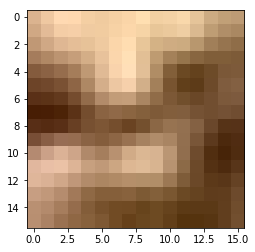

array([[0.9056565]], dtype=float32)

In [279]:
ejemplo = np.array(Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/TestImg Segmentadas16x16/imgID20151127_Lambra_c-R0C14.jpg"))
plt.imshow(ejemplo)
plt.show()

prueba = ejemplo[np.newaxis,:]/255
#prueba.shape
modelp5sl.predict(prueba)

### Paso 7.4: Predecimos la cantidad de microplasticos en cada imagen

In [4]:
dfTest = pd.read_csv("MuestrasPrueba (2,3,4-11-17)/Recortada/ImgTest-Datos.csv", sep =';')
dfTest

,Nombre Img,Date,Location,Replicate,total debris (gr/m2),micro debris (gr/m2),meso debris (gr/m2)
0,20151127_Lambra_c,27/11/2015,Lambra,C,"135,09","69,7448","65,3452"
1,20160201_Lambra_c,01/02/2016,Lambra,C,"71,924","47,0436","24,8804"


In [1]:
totalDebris1 = dfTest["total debris (gr/m2)"].iloc[0].replace(",",".")
totalDebris1

NameError: name 'dfTest' is not defined

In [281]:
#Contamos el numero de segmentos que tienen 1.
counter_test_img1 = np.count_nonzero(pv_test_img1)
counter_test_img2 = np.count_nonzero(pv_test_img2)
regrTest1 = regr.predict(counter_test_img1)
regrTest2 = regr.predict(counter_test_img2)

print("Para los n segmentos = ",counter_test_img1 ," se estima unos ", regrTest1, " mg")
print("Para los n segmentos = ",counter_test_img2 ," se estima unos ", regrTest2, " mg")

Para los n segmentos =  4668  se estima unos  [25737.03631686]  mg
Para los n segmentos =  15021  se estima unos  [83449.45150249]  mg


# Paso 8: Visualizar las imágenes con predict

In [26]:
from keras.models                import Sequential, Model
from keras.layers                import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.layers                import Conv2DTranspose, UpSampling2D, MaxPooling2D, Reshape, Activation, ReLU
from keras.preprocessing.image   import ImageDataGenerator
from keras.utils                 import to_categorical
from keras.optimizers            import SGD
from keras.callbacks             import ModelCheckpoint, LearningRateScheduler

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from os import scandir, getcwd

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
#Primero entrenaremos con el mismo modelo que en la prueba4
modelp4 = Sequential()
modelp4.add(Conv2D(16, (3, 3), input_shape=(16, 16,3)))
modelp4.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp4.add(Activation('relu'))

modelp4.add(Conv2D(64, (3, 3)))
modelp4.add(MaxPooling2D(pool_size=(2, 2))) #Comprimir la info y hacer que sea menos propensa a errores de traslaciones
modelp4.add(Activation('relu'))

modelp4.add(Flatten())  
modelp4.add(Dense(128, activation='relu'))
modelp4.add(Dense(64, activation='relu'))
modelp4.add(Dropout(0.5))
modelp4.add(Dense(1, activation='sigmoid'))
modelp4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [28]:
#Cargamos los pesos del modelo
modelp4.load_weights('Segmentation16x16RedPesos.hdf5')   

In [29]:
def lsTestIMG(imgName, ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if (arch.is_file() and arch.name.endswith('.jpg') 
                                                    and arch.name.startswith(imgName[0:-4]))] 
def segmentarImg(img):
    n = int(2240/16) #140
    listaRegionesTest = []
    recort = Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/test/"+img)
    for i in range(0,n):
        for j in range(0,n):
            region = recort.crop((i*16,j*16,i*16+16,j*16+16))
            subtring = img[0:-4]
            region.save("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/TestImg Segmentadas16x16/"+
                        "imgID-"+subtring+"-R"+"{0:0=3d}".format(i)+"C"+"{0:0=3d}".format(j)+".jpg")
            listaRegionesTest.append("imgID-"+subtring+"-R"+"{0:0=3d}".format(i)+"C"+"{0:0=3d}".format(j)+".jpg")
    return listaRegionesTest
    
def evaluarVisualizarIMG(imagenPaVer):
    listNuevasPruebas = lsTestIMG("imgID-"+imagenPaVer,
                                  "F:\Microplasticos\MuestrasPrueba (2,3,4-11-17)\Recortada\\2240x2240\TestImg Segmentadas16x16")
    
    #Hay que segmentarla si no está segmentada o faltan segmentos
    if (not listNuevasPruebas) or (len(listNuevasPruebas)<140*140):
        listNuevasPruebas = segmentarImg(imagenPaVer)
        
    arrayNuevasPruebas = np.array([np.array(
                            Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/TestImg Segmentadas16x16/"+img)) 
                                   for img in listNuevasPruebas])
    arrayNuevasPruebas = arrayNuevasPruebas / 255.0

    evalNuevasPruebas =  np.ravel(modelp4.predict(arrayNuevasPruebas))
    evalNuevasPruebas = np.asarray([int(round(i)) for i in evalNuevasPruebas])
    counterNuevasPruebas = np.count_nonzero(evalNuevasPruebas)
    n = int(2240/16) #140
            
    listVisual = np.asarray(listNuevasPruebas).reshape((n,n))
    evalVisual = evalNuevasPruebas.reshape((n, n))
    fondo = Image.new('RGBA', (2240, 2240), "black") 
    mask = Image.new('RGBA', (2240, 2240), "black") 
    blanco = Image.new('RGBA', (16, 16), "white")
    
    for i in range(0,n):
        for j in range(0,n):
            if evalVisual[i][j] == 1:
                imagen = Image.open("MuestrasPrueba (2,3,4-11-17)/Recortada/2240x2240/TestImg Segmentadas16x16/"+listVisual[i][j])
                fondo.paste(imagen,(i*16,j*16))
                mask.paste(blanco,(i*16,j*16))
    
    fondo.save("%s_predict.png" %imagenPaVer[0:-4])
    mask.save("%s_mask.png"  %imagenPaVer[0:-4])  
    
    plt.figure(figsize=(15,15))
    plt.subplot(111)
    plt.axis('off')
    plt.title(imagenPaVer)
    array = np.array(fondo)
    plt.imshow(array)
    


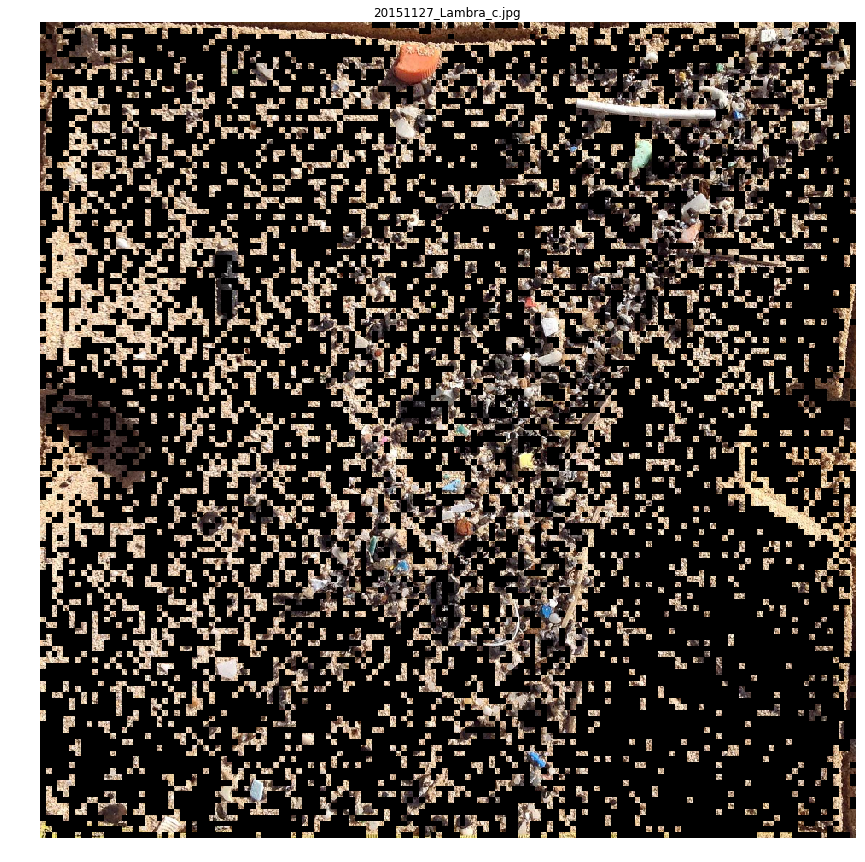

In [30]:
evaluarVisualizarIMG("20151127_Lambra_c.jpg")

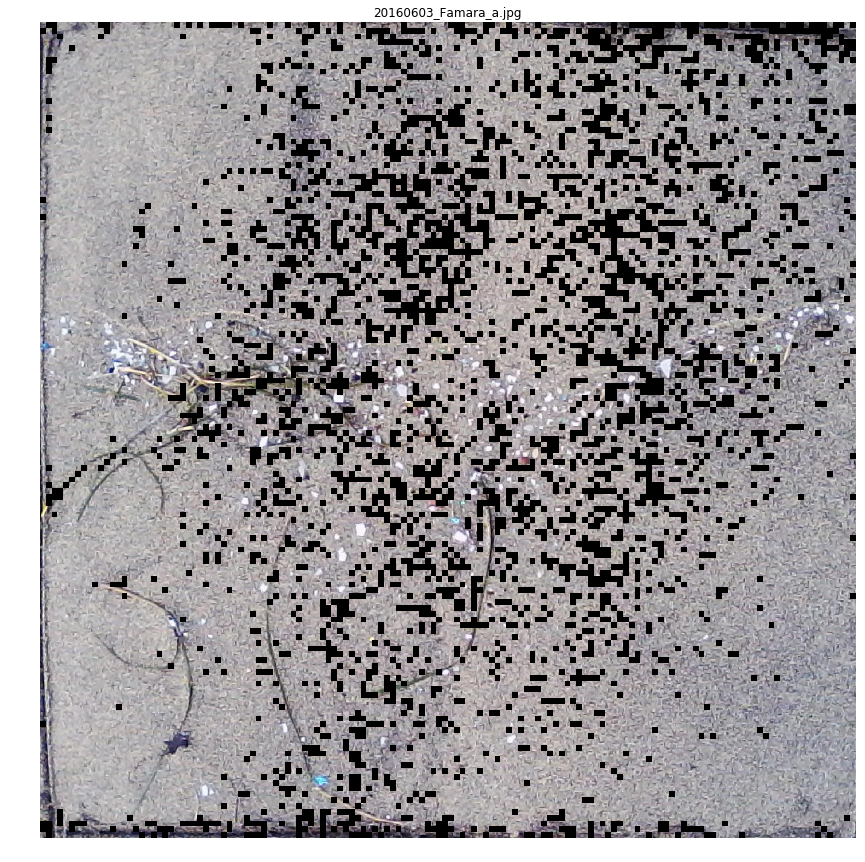

In [23]:
evaluarVisualizarIMG("20160603_Famara_a.jpg")

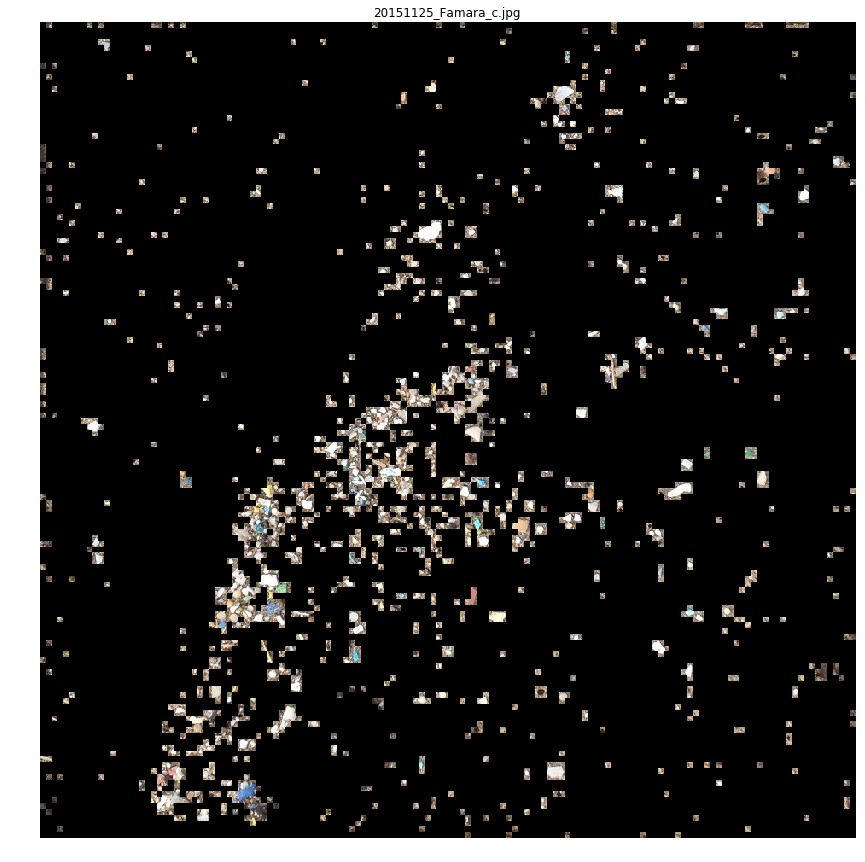

In [31]:
evaluarVisualizarIMG("20151125_Famara_c.jpg")